In [1]:
#11:45

In [2]:
cd

C:\Users\K Tarun


In [3]:
cd C:\Users\K Tarun\Desktop\Prudent consulting

C:\Users\K Tarun\Desktop\Prudent consulting


In [4]:
ls

 Volume in drive C is Acer
 Volume Serial Number is EC9F-7E59

 Directory of C:\Users\K Tarun\Desktop\Prudent consulting

08-06-2024  22:20    <DIR>          .
08-06-2024  16:16    <DIR>          ..
08-06-2024  11:23    <DIR>          .ipynb_checkpoints
08-06-2024  22:20           694,429 Hackthon.ipynb
08-06-2024  17:48         1,124,326 output_sorted.csv
08-06-2024  18:02           348,199 Retail Demand Forecasting.pptx
08-06-2024  11:41           393,899 sample_submission.csv
08-06-2024  11:41           975,309 test.csv
08-06-2024  11:41        17,333,449 train.csv
               6 File(s)     20,869,611 bytes
               3 Dir(s)   6,647,336,960 bytes free


In [5]:
#importing the essential libraries

In [6]:
import numpy as np
import pandas as pd

In [7]:
import warnings

# Filter to ignore all warnings
warnings.filterwarnings("ignore")

In [8]:
#importing libraries for visulaization

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Loading the data

In [10]:
data = pd.read_csv('train.csv')

In [11]:
#checking the dimensions of the data
print(f"Shape of Data is {data.shape}")

Shape of Data is (913000, 4)


In [12]:
#columns available
data.columns

Index(['date', 'store', 'item', 'sales'], dtype='object')

In [13]:
#identifying the dependent and independent columns
input_columns = ['date', 'store', 'item']
target_column = ['sales']

In [14]:
#retriving the top N records of the data
data.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [15]:
#retriving the bottom N records of the data
data.tail()

,date,store,item,sales
912995,2017-12-27,10,50,63
912996,2017-12-28,10,50,59
912997,2017-12-29,10,50,74
912998,2017-12-30,10,50,62
912999,2017-12-31,10,50,82


In [16]:
#checking the info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 27.9+ MB


In [17]:
#Understanding the statistics of the data
data.describe()

,store,item,sales
count,913000.000000,913000.000000,913000.000000
mean,5.500000,25.500000,52.250287
std,2.872283,14.430878,28.801144
min,1.000000,1.000000,0.000000
25%,3.000000,13.000000,30.000000
50%,5.500000,25.500000,47.000000
75%,8.000000,38.000000,70.000000
max,10.000000,50.000000,231.000000


In [18]:
data.dtypes

date     object
store     int64
item      int64
sales     int64
dtype: object

### 2. Data Cleaning

In [19]:
#checking for duplicate records
data.duplicated().sum()

0

In [20]:
#checking the missing values
data.isnull().sum()

date     0
store    0
item     0
sales    0
dtype: int64

In [21]:
#Since the data is time series data the date column is should be in "time series format", convert it datatime format
data['date']  = pd.to_datetime(data['date'])

In [22]:
print(data.dtypes)
data.head()

date     datetime64[ns]
store             int64
item              int64
sales             int64
dtype: object


,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [23]:
#minimum and maximum dates
print("start date:",min(data['date']))
print("end date:",max(data['date']))

start date: 2013-01-01 00:00:00
end date: 2017-12-31 00:00:00


### 3. Feature Engineering

In [24]:
#Feature Engineering
data['year'] = data['date'].dt.year
data['Month'] = data['date'].dt.month
data['day'] = data['date'].dt.day
data['weekday'] = data['date'].dt.weekday

In [25]:
data.head()

,date,store,item,sales,year,Month,day,weekday
0,2013-01-01,1,1,13,2013,1,1,1
1,2013-01-02,1,1,11,2013,1,2,2
2,2013-01-03,1,1,14,2013,1,3,3
3,2013-01-04,1,1,13,2013,1,4,4
4,2013-01-05,1,1,10,2013,1,5,5


In [26]:
# Creating dictionaries for mapping
weekdays = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
months = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
          7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}

In [27]:
# Applying the mappings
data['weekday'] = data['weekday'].map(weekdays)
data['Month'] = data['Month'].map(months)

In [28]:
data.head()

,date,store,item,sales,year,Month,day,weekday
0,2013-01-01,1,1,13,2013,January,1,Tuesday
1,2013-01-02,1,1,11,2013,January,2,Wednesday
2,2013-01-03,1,1,14,2013,January,3,Thursday
3,2013-01-04,1,1,13,2013,January,4,Friday
4,2013-01-05,1,1,10,2013,January,5,Saturday


In [29]:
#since the Store and item are representing a unique entities typecasting them from integer to categorical
data['store'] = data['store'].astype('category')
data['item'] = data['item'].astype('category')

In [30]:
#No of unique Stores available in the data
data['store'].unique()

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Categories (10, int64): [1, 2, 3, 4, ..., 7, 8, 9, 10]

In [31]:
#No of unique items available in the data
data['item'].unique()

[1, 2, 3, 4, 5, ..., 46, 47, 48, 49, 50]
Length: 50
Categories (50, int64): [1, 2, 3, 4, ..., 47, 48, 49, 50]

In [32]:
# To perform forecasting, ensure that data needs to sorted by time column
data = data.sort_values(by='date')

In [33]:
data.head(500)

,date,store,item,sales,year,Month,day,weekday
0,2013-01-01,1,1,13,2013,January,1,Tuesday
211816,2013-01-01,7,12,26,2013,January,1,Tuesday
832656,2013-01-01,7,46,27,2013,January,1,Tuesday
213642,2013-01-01,8,12,54,2013,January,1,Tuesday
215468,2013-01-01,9,12,35,2013,January,1,Tuesday
...,...,...,...,...,...,...,...,...
452848,2013-01-01,9,25,45,2013,January,1,Tuesday
741356,2013-01-01,7,41,8,2013,January,1,Tuesday
436414,2013-01-01,10,24,35,2013,January,1,Tuesday
1826,2013-01-01,2,1,12,2013,January,1,Tuesday


In [34]:
# Making the date column as index
data.set_index('date', inplace=True)
data.head()

,store,item,sales,year,Month,day,weekday
date,,,,,,,
2013-01-01,1,1,13,2013,January,1,Tuesday
2013-01-01,7,12,26,2013,January,1,Tuesday
2013-01-01,7,46,27,2013,January,1,Tuesday
2013-01-01,8,12,54,2013,January,1,Tuesday
2013-01-01,9,12,35,2013,January,1,Tuesday


### 4. Exploratory Data Analysis

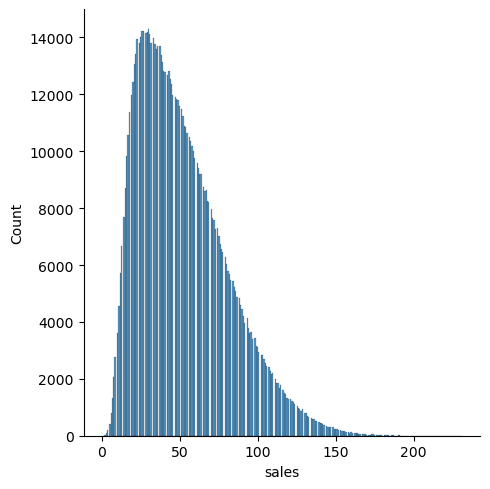

In [35]:
#density of sales
sns.displot(data['sales'])

### observation: From the above visualization we could see that data is skewed towards left, and mostly sales are occuring between ~20 to ~90

<Axes: title={'center': 'Total Sales'}, xlabel='date'>

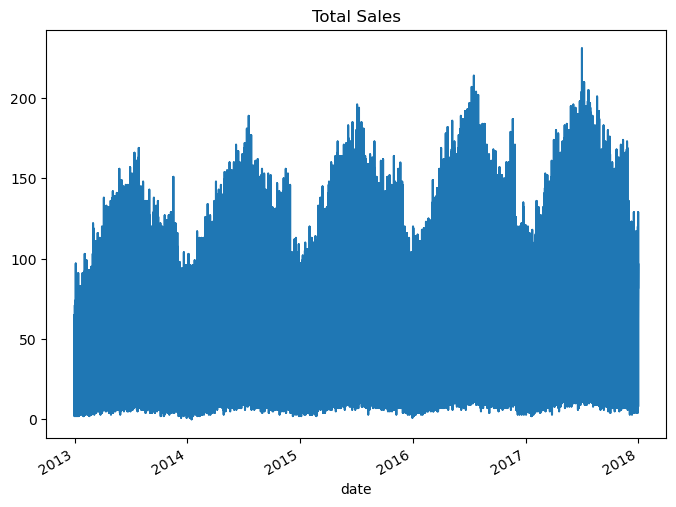

In [36]:
plt.figure(figsize=(8,6))
plt.title('Total Sales',loc = 'center')
data['sales'].plot()

### Observation: The data has seasonality and repeating same pattern every year. The sales at the beginning and end of the year are low and high at middle of the year

<Axes: title={'center': 'Total Sales'}, xlabel='date', ylabel='sales'>

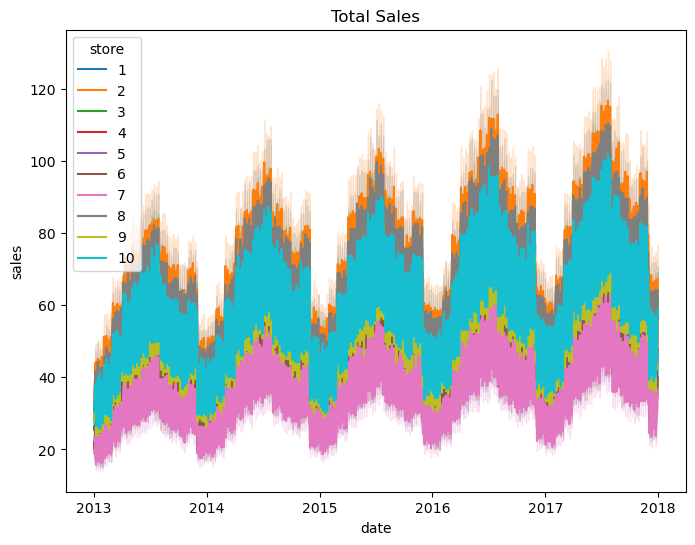

In [37]:
plt.figure(figsize=(8,6))
plt.title('Total Sales',loc = 'center')
sns.lineplot(data, x = data.index, y='sales', hue='store')

In [38]:
#maximum and minimum sale over the given period of time
maxSale = max(data['sales'])
minSale = min(data['sales'])
print(f"maximum sales {maxSale}, minmun sales {minSale}")

maximum sales 231, minmun sales 0


In [39]:
#checking for the records with maximum and minimun sale
print("Max Sales records")
data.loc[data['sales'] == maxSale]

Max Sales records


,store,item,sales,year,Month,day,weekday
date,,,,,,,
2017-07-02,2,15,231,2017,July,2,Sunday


In [40]:
print("Min Sales records")
data.loc[data['sales'] == minSale]

Min Sales records


,store,item,sales,year,Month,day,weekday
date,,,,,,,
2014-01-15,6,4,0,2014,January,15,Wednesday


<Axes: title={'center': 'Sales per weekday'}, xlabel='weekday', ylabel='sales'>

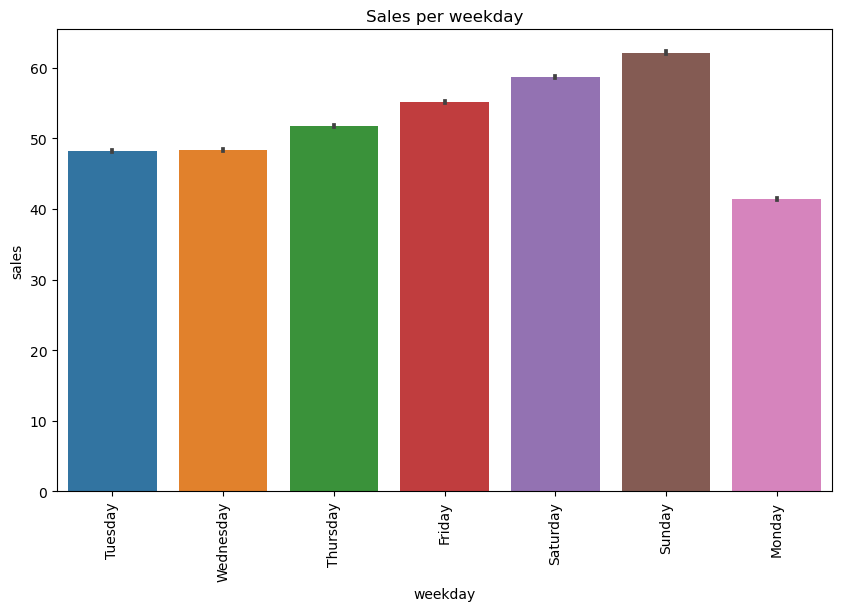

In [41]:
#Total yearly and monthly and daily sales
plt.figure(figsize=(10,6))
plt.title('Sales per weekday',loc = 'center')
plt.xticks(rotation=90)
sns.barplot(data=data,x = 'weekday', y='sales')

### Observation: From the above visualization the sales are high on weekends and comparitively low on the Normal days

<Axes: title={'center': 'Sales per Month'}, xlabel='Month', ylabel='sales'>

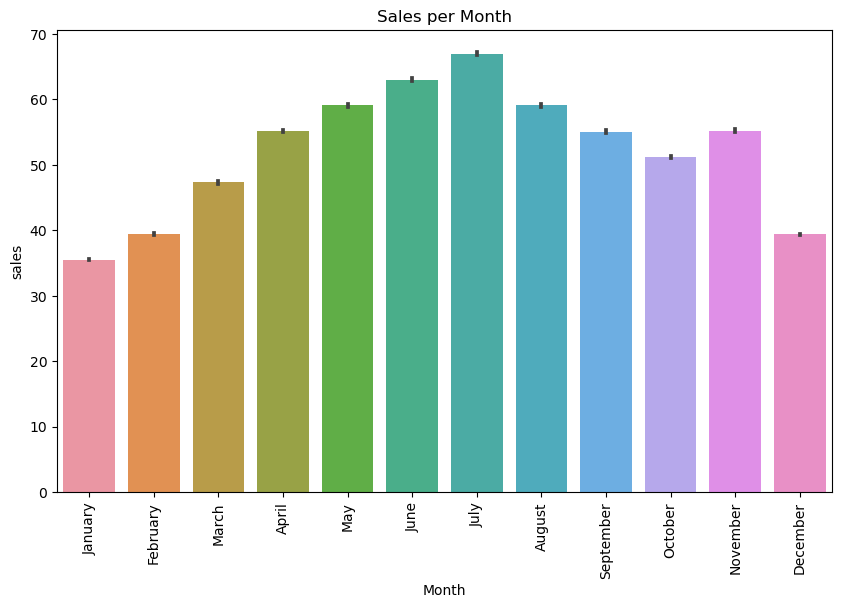

In [42]:
#Total yearly and monthly and daily sales
plt.figure(figsize=(10,6))
plt.title('Sales per Month',loc = 'center')
plt.xticks(rotation=90)
sns.barplot(data=data,x = 'Month', y='sales')

### From the above bar graph we could interpret that the sales are high in june, july and gradually decreasing both sides except November

In [43]:
# item with with top sales
data_grp = data[['item', 'sales']].groupby(by='item').aggregate({'sum', 'mean'})

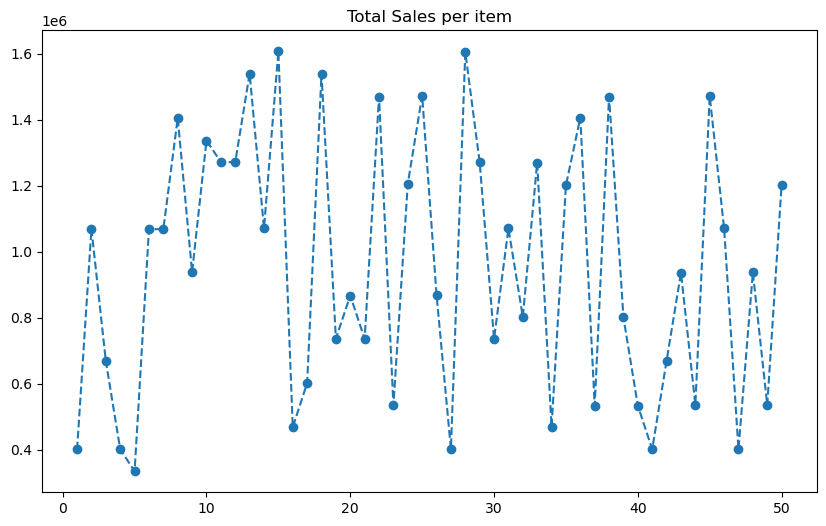

In [44]:
plt.figure(figsize=(10,6))
plt.title('Total Sales per item',loc = 'center')
plt.plot(data_grp['sales']['sum'], linestyle = '--', marker = 'o')

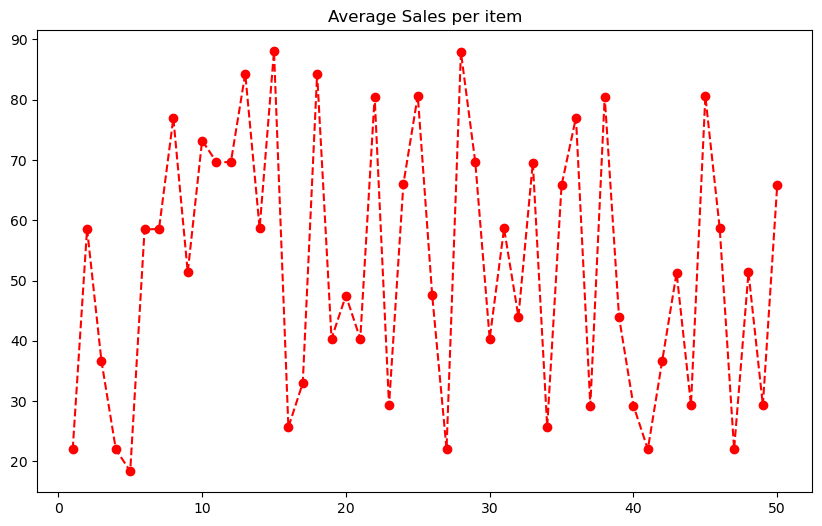

In [45]:
plt.figure(figsize=(10,6))
plt.title('Average Sales per item',loc = 'center')
plt.plot(data_grp['sales']['mean'], linestyle = '--', marker = 'o', color='red')

In [46]:
# item with with top sales
data_grp_st = data[['store', 'sales']].groupby(by='store').aggregate({'sum', 'mean'})

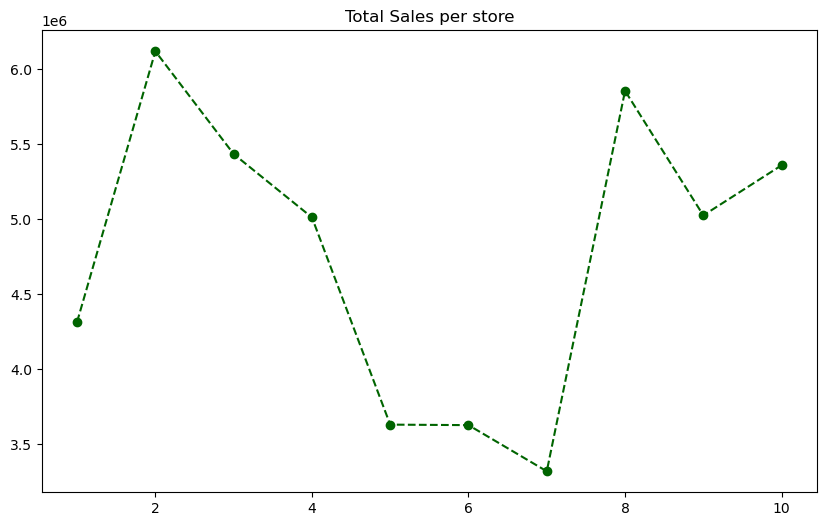

In [47]:
plt.figure(figsize=(10,6))
plt.title('Total Sales per store',loc = 'center')
plt.plot(data_grp_st['sales']['sum'], linestyle = '--', marker = 'o', color = 'darkgreen')

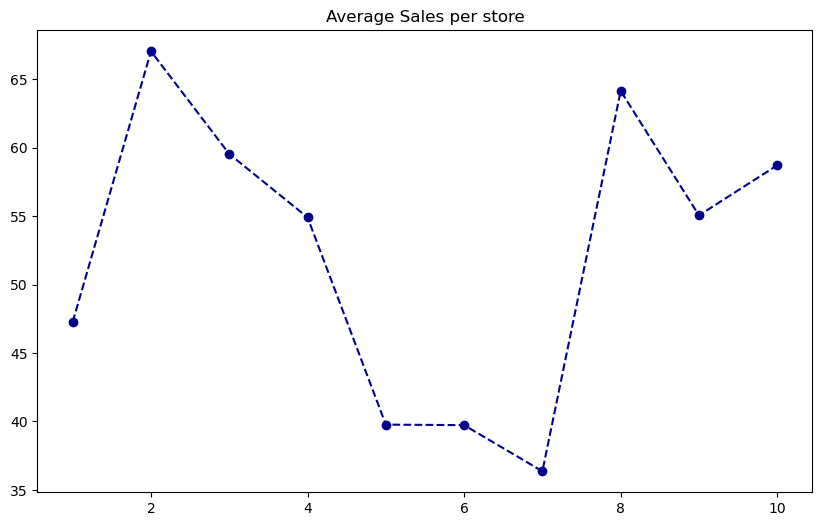

In [48]:
plt.figure(figsize=(10,6))
plt.title('Average Sales per store',loc = 'center')
plt.plot(data_grp_st['sales']['mean'], linestyle = '--', marker = 'o', color = 'darkblue')

In [49]:
# importing Essential libraries for checking stationarity of data

In [50]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import itertools
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [51]:
# writing Function to perform the ADF test
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    for key, value in result[4].items():
        print(f'Critical Value {key}: {value}')
    return result

### To perform demand forecasting accurately, we need to account for variations across different stores. Therefore, we will extract separate dataframes for each store, allowing us to analyze and model the sales data for each store individually. This approach ensures that store-specific trends and patterns are captured effectively.

In [56]:
def extract_store_dataframe(data, store_id):
    """
    Extracts a new dataframe filtered by the given store ID.
    Returns:
    pd.DataFrame: A new dataframe containing data for the specified store.
    """
    # Filter the dataframe by the given store ID
    store_data = data[data['store'] == (store_id)]
    
    # Sort the dataframe by the index (date) to ensure it is in chronological order
    store_data = store_data.sort_index()
    
    return store_data

In [57]:
# Create a dictionary to hold the dataframes for each store
store_dataframes = {}

In [58]:
for store_id in range(1, 10+1):
    store_dataframes[store_id] = extract_store_dataframe(data, store_id)

In [59]:
# accessing each store's dataframe
for store_id, df in store_dataframes.items():
    print(f"Store {store_id} data:")
    print(df.head())
    print("*"*25)

Store 1 data:
           store item  sales  year    Month  day  weekday
date                                                     
2013-01-01     1    1     13  2013  January    1  Tuesday
2013-01-01     1   13     37  2013  January    1  Tuesday
2013-01-01     1   14     22  2013  January    1  Tuesday
2013-01-01     1   46     30  2013  January    1  Tuesday
2013-01-01     1   11     37  2013  January    1  Tuesday
*************************
Store 2 data:
           store item  sales  year    Month  day  weekday
date                                                     
2013-01-01     2   13     51  2013  January    1  Tuesday
2013-01-01     2   46     43  2013  January    1  Tuesday
2013-01-01     2   14     33  2013  January    1  Tuesday
2013-01-01     2   11     51  2013  January    1  Tuesday
2013-01-01     2   47     12  2013  January    1  Tuesday
*************************
Store 3 data:
           store item  sales  year    Month  day  weekday
date                                

In [69]:
for i in range(1, len(store_dataframes)+1):
    st = str(i)
    adf_result = adf_test(store_dataframes[i]['sales'])
    alpha = 0.05
    p_value = adf_result[1]
    if p_value < alpha:
        print(f"The store {st} data is stationary.")
    else:
        print(f"The store {st} data is not stationary.")
    print('\n')

ADF Statistic: -14.451135729830899
p-value: 7.095337131381847e-27
Critical Value 1%: -3.4304216765749693
Critical Value 5%: -2.8615716798896482
Critical Value 10%: -2.5667868621025502
The store 1 data is stationary.
ADF Statistic: -14.050447550376926
p-value: 3.184481861926199e-26
Critical Value 1%: -3.430421678931965
Critical Value 5%: -2.8615716809313896
Critical Value 10%: -2.566786862657035
The store 2 data is stationary.
ADF Statistic: -14.469664398950215
p-value: 6.637503459086884e-27
Critical Value 1%: -3.4304216781462826
Critical Value 5%: -2.861571680584135
Critical Value 10%: -2.566786862472203
The store 3 data is stationary.
ADF Statistic: -14.022712622694375
p-value: 3.547767241758546e-26
Critical Value 1%: -3.430421678931965
Critical Value 5%: -2.8615716809313896
Critical Value 10%: -2.566786862657035
The store 4 data is stationary.
ADF Statistic: -14.206157717925507
p-value: 1.7534018307957925e-26
Critical Value 1%: -3.4304216773606173
Critical Value 5%: -2.86157168023688

Store 1


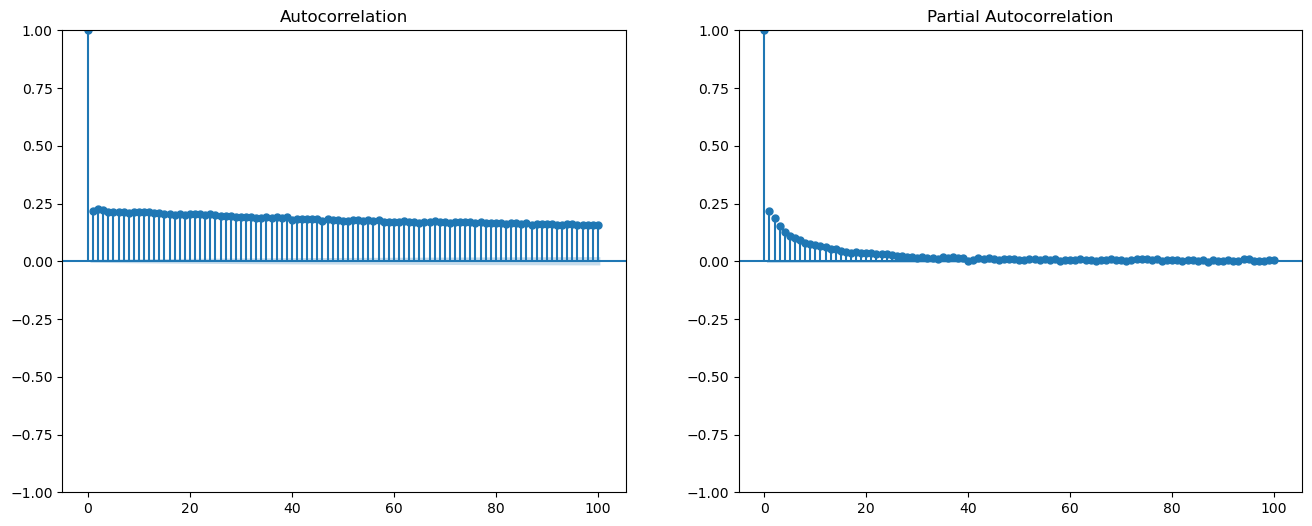

Store 2


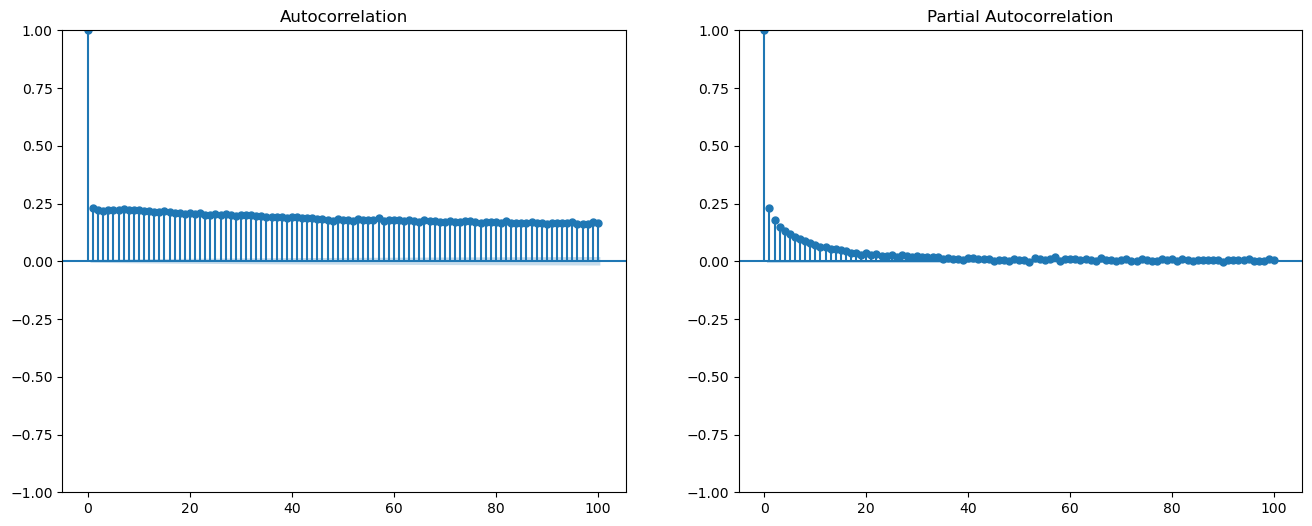

Store 3


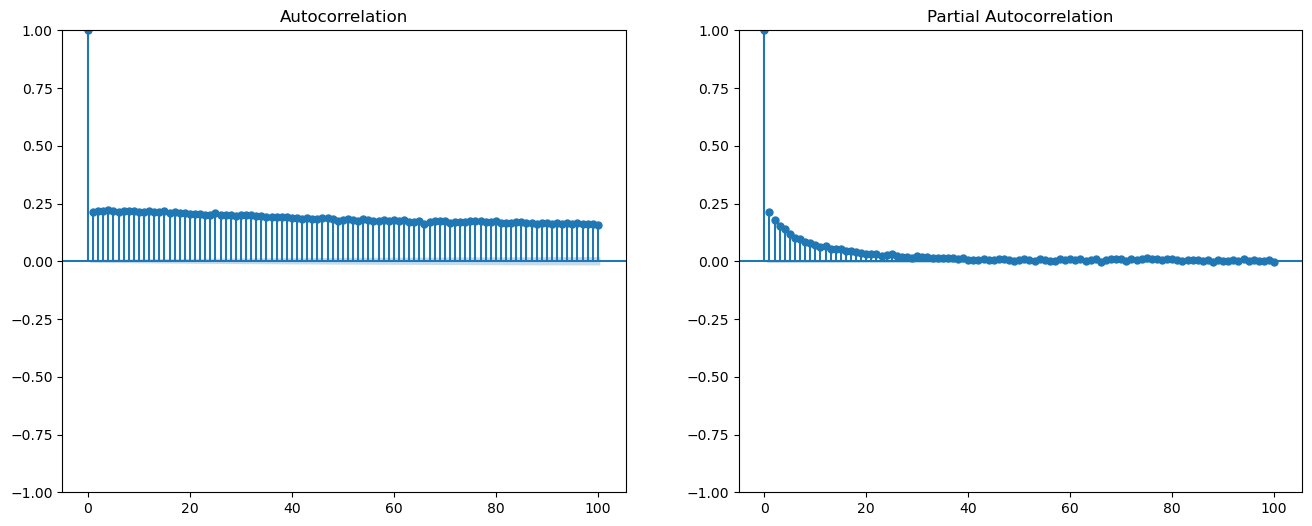

Store 4


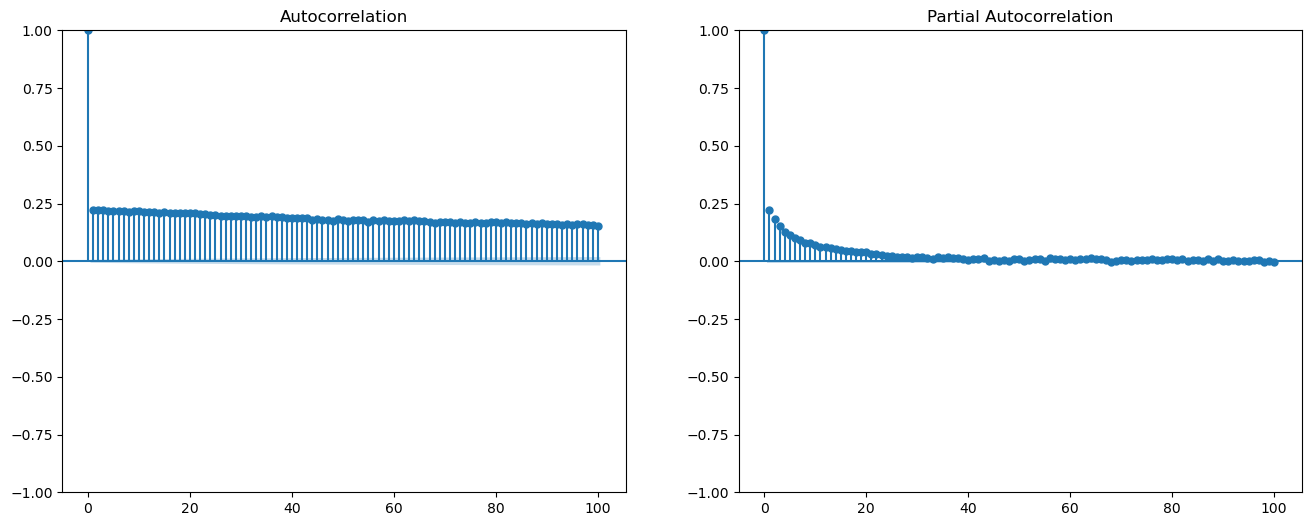

Store 5


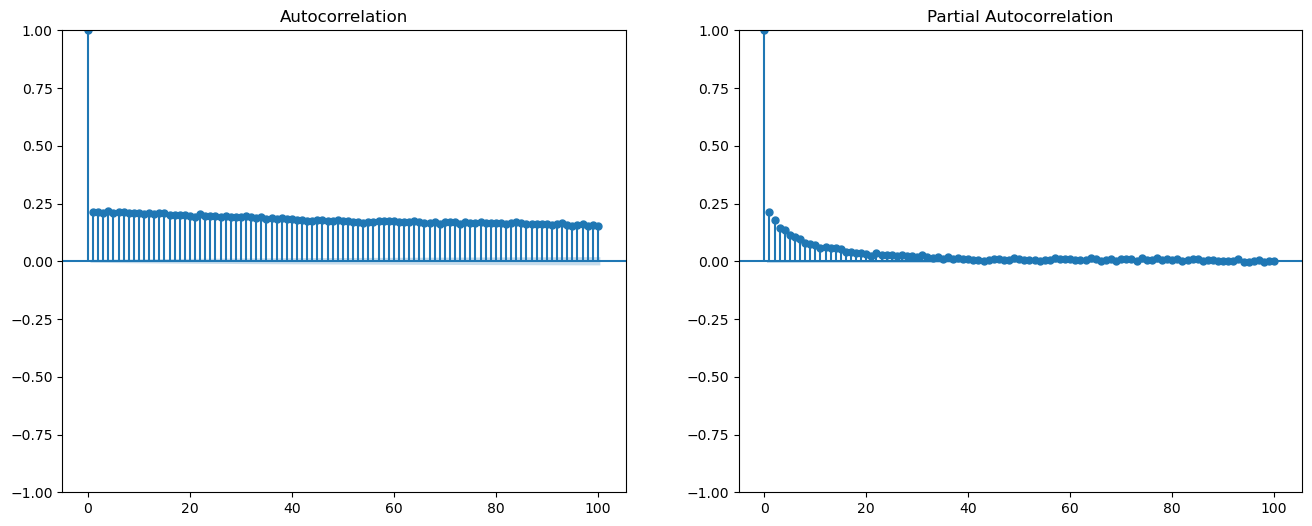

Store 6


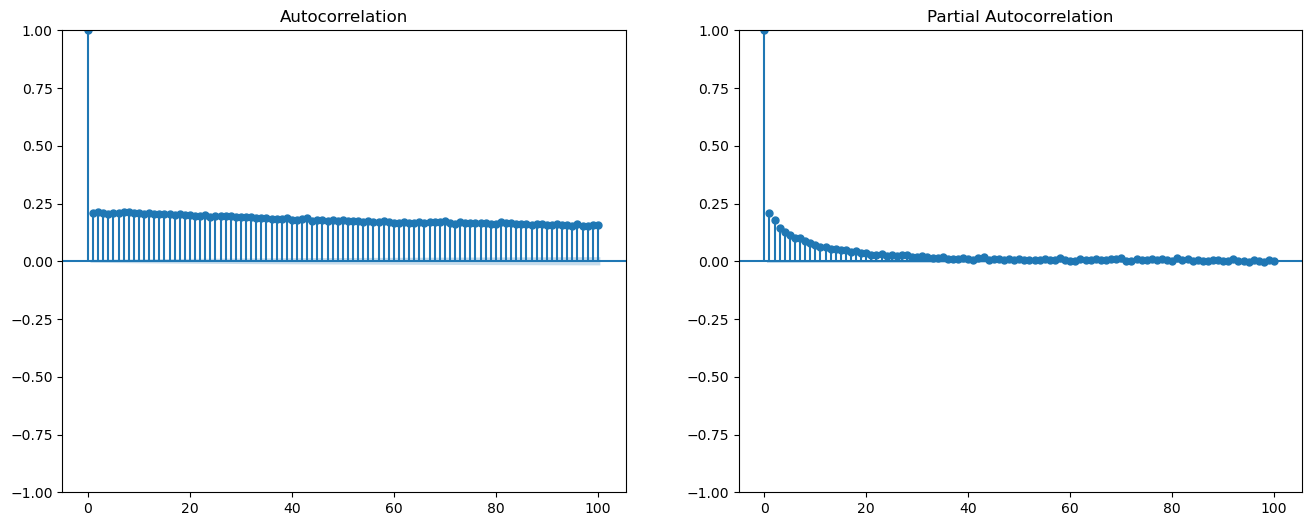

Store 7


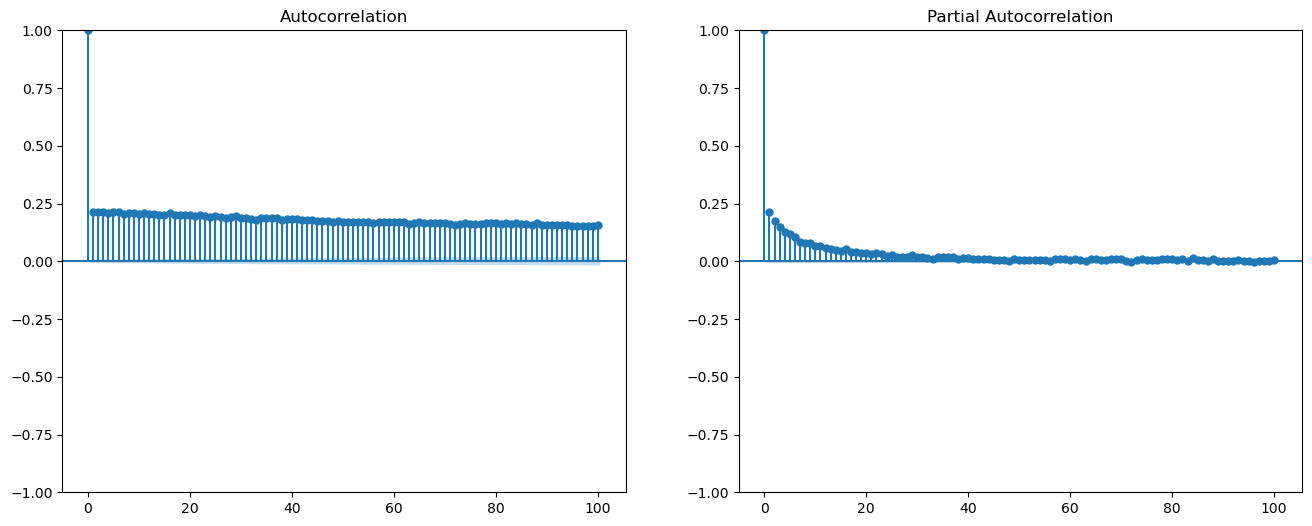

Store 8


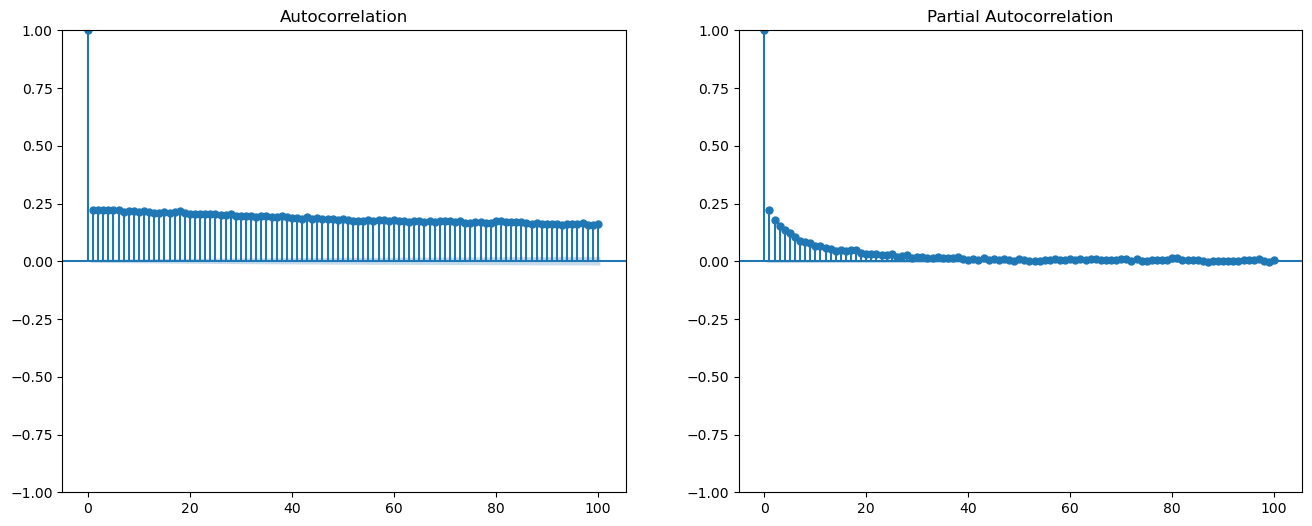

Store 9


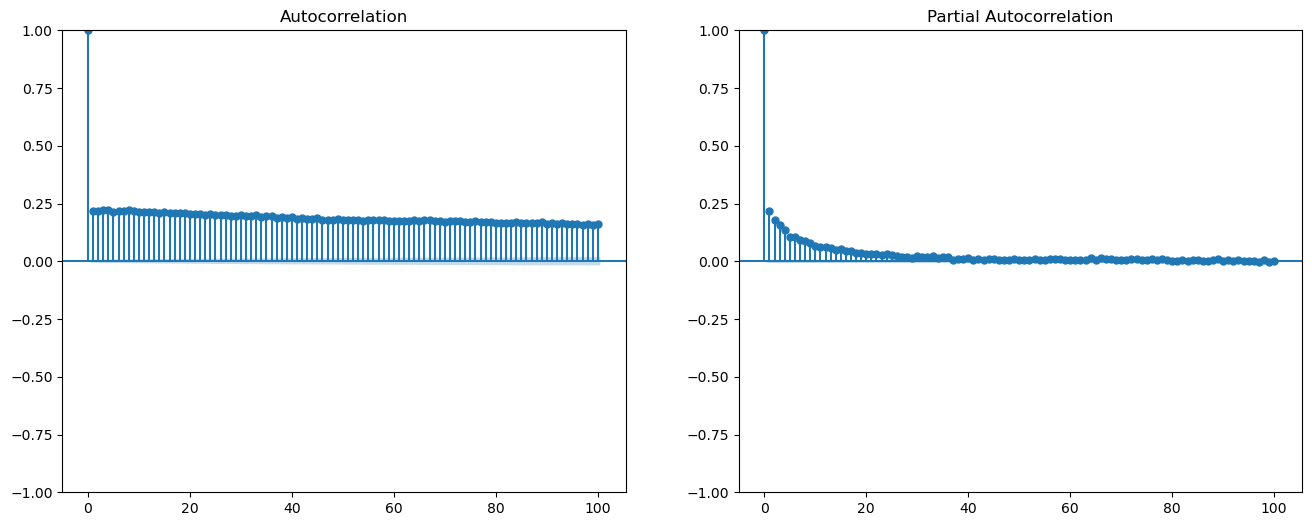

Store 10


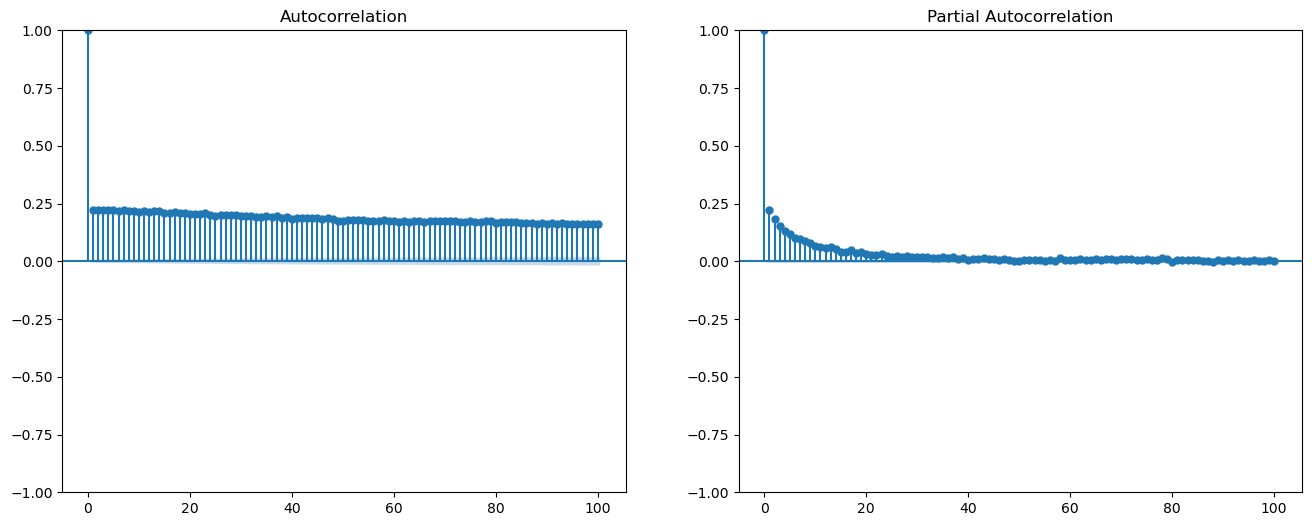

In [75]:
for i in range(1, len(store_dataframes)+1):
    st = str(i)
    sales = store_dataframes[i]['sales']
    print(f"Store {st}")
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    plot_acf(sales, lags=100, ax=axes[0])
    plot_pacf(sales, lags=100, ax=axes[1])
    plt.show()

In [76]:
#since the data is stationary therefore d is 0
#from the above ACF and PACF we could determine the p,q is ~2, ~2

### 5. Model Building

In [78]:
# importing essential libraries for model building
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [82]:
pdq = (2,0,2)

In [ ]:
for i in range(1, len(store_dataframes)+1):
    st = str(i)

#### Forecasting for Store1

In [83]:
# Train the best ARIMA model
best_model = sm.tsa.ARIMA(store_dataframes[1]['sales'], order=pdq)
results = best_model.fit()

C:\Users\K Tarun\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\K Tarun\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\K Tarun\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [85]:
train_size = int(len(store_dataframes[1]) * 0.8)
train, test = store_dataframes[1][:train_size], store_dataframes[1][train_size:]
forecast = results.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')

In [86]:
rmse = np.sqrt(mean_squared_error(test['sales'], forecast))
mae = mean_absolute_error(test['sales'], forecast)

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')

RMSE: 24.140726668558035
MAE: 20.227787847957536


#### Forecastings  for store 2

In [88]:
model2 = sm.tsa.ARIMA(store_dataframes[2]['sales'], order=pdq)
result2 = model2.fit()
train_size = int(len(store_dataframes[2]) * 0.8)
train, test = store_dataframes[2][:train_size], store_dataframes[2][train_size:]
forecast = result2.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')
rmse = np.sqrt(mean_squared_error(test['sales'], forecast))
mae = mean_absolute_error(test['sales'], forecast)

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')

C:\Users\K Tarun\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\K Tarun\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\K Tarun\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RMSE: 33.672642469600035
MAE: 28.349866209760147


#### Forecastings  for Store 3

In [92]:
model3 = sm.tsa.ARIMA(store_dataframes[3]['sales'], order=pdq)
result3 = model3.fit()
train_size = int(len(store_dataframes[3]) * 0.8)
train, test = store_dataframes[3][:train_size], store_dataframes[3][train_size:]
forecast = result3.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')
rmse = np.sqrt(mean_squared_error(test['sales'], forecast))
mae = mean_absolute_error(test['sales'], forecast)

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')

C:\Users\K Tarun\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\K Tarun\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\K Tarun\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RMSE: 30.033728497619173
MAE: 25.265966953934008


#### Forecastings for Store 4 

In [93]:
model4 = sm.tsa.ARIMA(store_dataframes[4]['sales'], order=pdq)
result4 = model4.fit()
train_size = int(len(store_dataframes[4]) * 0.8)
train, test = store_dataframes[4][:train_size], store_dataframes[4][train_size:]
forecast = result4.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')
rmse = np.sqrt(mean_squared_error(test['sales'], forecast))
mae = mean_absolute_error(test['sales'], forecast)

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')

C:\Users\K Tarun\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\K Tarun\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\K Tarun\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RMSE: 27.818916871761477
MAE: 23.357425152678722


#### forecastings for store 5

In [95]:
model5 = sm.tsa.ARIMA(store_dataframes[5]['sales'], order=pdq)
result5 = model5.fit()
train_size = int(len(store_dataframes[5]) * 0.8)
train, test = store_dataframes[5][:train_size], store_dataframes[5][train_size:]
forecast = result5.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')
rmse = np.sqrt(mean_squared_error(test['sales'], forecast))
mae = mean_absolute_error(test['sales'], forecast)

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')

C:\Users\K Tarun\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\K Tarun\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\K Tarun\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RMSE: 20.49794896477102
MAE: 17.17408536375332


#### Forecastings for store 6 

In [97]:
model6 = sm.tsa.ARIMA(store_dataframes[6]['sales'], order=pdq)
result6 = model6.fit()
train_size = int(len(store_dataframes[6]) * 0.8)
train, test = store_dataframes[6][:train_size], store_dataframes[6][train_size:]
forecast = result6.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')
rmse = np.sqrt(mean_squared_error(test['sales'], forecast))
mae = mean_absolute_error(test['sales'], forecast)

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')

C:\Users\K Tarun\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\K Tarun\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\K Tarun\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RMSE: 20.496596411496963
MAE: 17.140666935375503


#### Forecastings for store7

In [98]:
model7 = sm.tsa.ARIMA(store_dataframes[7]['sales'], order=pdq)
result7 = model7.fit()
train_size = int(len(store_dataframes[7]) * 0.8)
train, test = store_dataframes[7][:train_size], store_dataframes[7][train_size:]
forecast = result7.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')
rmse = np.sqrt(mean_squared_error(test['sales'], forecast))
mae = mean_absolute_error(test['sales'], forecast)

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')

C:\Users\K Tarun\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\K Tarun\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\K Tarun\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RMSE: 18.785908638828513
MAE: 15.712085349330286


#### Forecastings for store 8

In [115]:
model8 = sm.tsa.ARIMA(store_dataframes[8]['sales'], order=pdq)
result8 = model8.fit()
train_size = int(len(store_dataframes[8]) * 0.8)
train, test = store_dataframes[8][:train_size], store_dataframes[8][train_size:]
forecast = result8.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')
rmse = np.sqrt(mean_squared_error(test['sales'], forecast))
mae = mean_absolute_error(test['sales'], forecast)

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')

C:\Users\K Tarun\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\K Tarun\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\K Tarun\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RMSE: 32.360141489469164
MAE: 27.238653248674837


#### Forecastings for store 9

In [116]:
model9 = sm.tsa.ARIMA(store_dataframes[9]['sales'], order=pdq)
result9 = model9.fit()
train_size = int(len(store_dataframes[9]) * 0.8)
train, test = store_dataframes[9][:train_size], store_dataframes[9][train_size:]
forecast = result9.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')
rmse = np.sqrt(mean_squared_error(test['sales'], forecast))
mae = mean_absolute_error(test['sales'], forecast)

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')

C:\Users\K Tarun\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\K Tarun\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\K Tarun\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RMSE: 28.00357431929811
MAE: 23.4992350677571


#### Forecasting for store 10

In [117]:
model10 = sm.tsa.ARIMA(store_dataframes[10]['sales'], order=pdq)
result10 = model10.fit()
train_size = int(len(store_dataframes[10]) * 0.8)
train, test = store_dataframes[10][:train_size], store_dataframes[10][train_size:]
forecast = result10.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')
rmse = np.sqrt(mean_squared_error(test['sales'], forecast))
mae = mean_absolute_error(test['sales'], forecast)

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')

C:\Users\K Tarun\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\K Tarun\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\K Tarun\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RMSE: 29.623882581160483
MAE: 24.91426813325412


## Test Data

In [118]:
test_data = pd.read_csv('test.csv')

In [119]:
test_data.shape

(45000, 4)

In [120]:
test_data.isnull().sum()

id       0
date     0
store    0
item     0
dtype: int64

In [121]:
test_data['date'] = pd.to_datetime(test_data['date'])

In [122]:
print(f"start date : {min(test_data['date'])}")
print(f"end date : {max(test_data['date'])}")

start date : 2018-01-01 00:00:00
end date : 2018-03-31 00:00:00


In [123]:
sorted_data = test_data.sort_values(by='date')

In [124]:
sorted_data.head()

,id,date,store,item
0,0,2018-01-01,1,1
32940,32940,2018-01-01,7,37
3960,3960,2018-01-01,5,5
32850,32850,2018-01-01,6,37
32760,32760,2018-01-01,5,37


In [125]:
sorted_data.set_index('date', inplace=True)
sorted_data.head()

,id,store,item
date,,,
2018-01-01,0,1,1
2018-01-01,32940,7,37
2018-01-01,3960,5,5
2018-01-01,32850,6,37
2018-01-01,32760,5,37


In [126]:
# Create a dictionary to hold the dataframes for each store
test_dataframes = {}

In [127]:
for store_id in range(1, 10+1):
    test_dataframes[store_id] = extract_store_dataframe(sorted_data, store_id)

In [132]:
forecasts = {}

In [133]:
# forecasting the sales for each store
[1] = results.predict(start=0, end=len(test_dataframes[1]) - 1, typ='levels')
forecasts[2] = result2.predict(start=0, end=len(test_dataframes[2]) - 1, typ='levels')
forecasts[3] = result3.predict(start=0, end=len(test_dataframes[3]) - 1, typ='levels')
forecasts[4] = result4.predict(start=0, end=len(test_dataframes[4]) - 1, typ='levels')
forecasts[5] = result5.predict(start=0, end=len(test_dataframes[5]) - 1, typ='levels')
forecasts[6] = result6.predict(start=0, end=len(test_dataframes[6]) - 1, typ='levels')
forecasts[7] = result7.predict(start=0, end=len(test_dataframes[7]) - 1, typ='levels')
forecasts[8] = result8.predict(start=0, end=len(test_dataframes[8]) - 1, typ='levels')
forecasts[9] = result9.predict(start=0, end=len(test_dataframes[9]) - 1, typ='levels')
forecasts[10] = result8.predict(start=0, end=len(test_dataframes[10]) - 1, typ='levels')

In [146]:
IDS = []
Forecasts = []

In [147]:
for _id in range(1, 10+1):
    for j in test_dataframes[_id]['id']:
        IDS.append(j)
print(len(IDS))

45000


In [148]:
for pred in range(1, 10+1):
    for j in forecasts[pred]:
        Forecasts.append(j)
print(len(Forecasts))

45000


In [149]:
output = {'id':IDS, 'sales':Forecasts}

In [150]:
output = pd.DataFrame(output)

In [151]:
output_sorted = output.sort_values(by='id')

In [152]:
output_sorted = output_sorted.reset_index(drop=True)

In [153]:
output_sorted.head()

,id,sales
0,0,47.266951
1,1,26.280611
2,2,26.824248
3,3,30.279483
4,4,33.170701


In [154]:
# Convert to CSV
output_sorted.to_csv('output_sorted.csv', index=False)